In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Data Analysis with Python IV - Merging and Reshaping Data

<!-- PELICAN_BEGIN_SUMMARY -->
Sometimes the way that data is stored in files or databases is not the way you need it for a data processing application.
Many people choose to do ad hoc processing of data from one form to another using a general purpose programming. 

Fortunately, pandas along with the Python standard library provide you with a high-level, flexible, and high-performance set of core manipulations
and algorithms to enable you to wrangle data into the right form without much trouble
<!-- PELICAN_END_SUMMARY -->

**Goals: How to merge/reshape data?**
<br>Specifically, I will cover
- Combining and Merging Data sets
- Reshaping and Pivoting Data
- Data Transformation
- String Manipulation


**Example - Reinsurance Premium Loss Data**
- The example is to merge and reshape data from different applications and ultimately determing business reinsurance coverage.
- This is a simplified and hypothetical example, but it's a great illustration of what Python can do for financial analysis. 
- The example data is generated by randomization function
  - ie: df = pd.DataFrame(np.random.randn(10,5),columns = ['A','B','C'])
- The input data is an excel file consisting of 2 tabs: premium and loss    

**Understand the business, what is abnormal value for this business?**
- If average premium per policy is between 10K to 200K, the premium outside this range is invalid
- If maximum ceded reinsurance retention is 500K, the ceded recoverable greater than 500K is invalid 

**View Excel File with Mulitple Tabs**
- List of tabs : note the display list including hidden tabs
- Number of tabs: using len function to count how many tabs in the Excel file
- View each tabs

I found python "len" function is very useful when dealing with Excel files have been updated with many tabs over time. 
<br>We can use Python to view/list/count all the tabs including hidden tabs. 


In [9]:
# View list of tabs including hidden tab

df_list = pd.ExcelFile('data/analysis4/Premium_Loss.xlsx')
print ('df_list.sheet_names=%s' % df_list.sheet_names)

# Count how many tabs in the Excel file 
number_tab = len(df_list.sheet_names)
number_tab
print("There are %s tab(s) in the file." % (number_tab)) 

df_list.sheet_names=['premium', 'loss']


2

There are 2 tab(s) in the file.


In [10]:
df_premium = pd.read_excel('data/analysis4/Premium_Loss.xlsx', sheet_name = "premium")
print("There are %s policies - here are the first 5:" % (df_premium.shape[0]))  
df_premium[0:5] 
df_prem_dupes=df_premium[df_premium.duplicated()]
print("There are %s duplicate policies" % (df_prem_dupes.shape[0]))  
df_prem_dupes.head()


There are 200 policies - here are the first 5:


,Policy Number,First Name,Last Name,Policy Effective Date,LOB,Policy Type,Premium,Coverage,Excess Coverage,Excess Policy
0,10880,Kurtis,Dumm,2017-07-08,Phy,CM,232058,1000000,3900000,96289.0
1,10962,Taisha,Whack,2017-09-19,Dentist,OCC,11308,1000000,3900000,91809.0
2,10962,Taisha,Whack,2017-09-19,Dentist,OCC,11308,1000000,3900000,91809.0
3,11339,Ricarda,Hotaka,2017-12-25,Podiatrist,OCC,2651,1000000,3900000,91367.0
4,11339,Ricarda,Hotaka,2017-12-25,Podiatrist,OCC,2651,1000000,3900000,91367.0


There are 2 duplicate policies


,Policy Number,First Name,Last Name,Policy Effective Date,LOB,Policy Type,Premium,Coverage,Excess Coverage,Excess Policy
2,10962,Taisha,Whack,2017-09-19,Dentist,OCC,11308,1000000,3900000,91809.0
4,11339,Ricarda,Hotaka,2017-12-25,Podiatrist,OCC,2651,1000000,3900000,91367.0


            *duplicate rows were found in the file, more detail about removing duplicate rows at the end of the blog*

In [11]:
df_loss = pd.read_excel('data/analysis4/Premium_Loss.xlsx', sheet_name = "loss") 
df_loss[0:5]  ## yes - I know I could have used head() but just demonstrating that slicing can achieve the same results
Count_Row=df_loss.shape[0] 
print("There are %s claims with losses" % (Count_Row))  

,Policy Number,Claim Number,Policy Type,First Name,Last Name,LossDate,LAE,Loss,Premium
0,35033,880247,OCC,Adolph,Iwan,2017-03-17,84373.0,10000000,176966.0
1,35033,880247,OCC,Adolph,Iwan,2017-03-17,84373.0,5000000,176966.0
2,47755,880255,OCC,Cherryl,Aven,2017-11-25,88205.0,4000000,116133.0
3,47755,880255,OCC,Cherryl,Aven,2017-11-25,88205.0,54785,116133.0
4,36838,880258,OCC,Franklin,Maen,2017-03-18,36440.0,54880,65872.0


There are 216 claims with losses


**How many policies have incurred losses? and save the result to Excel**
- Use Merge function with key identifier Policy Number
- Pandas.merge connects rows in DataFrames based on one or more keys
- By default merge does an 'inner' join - the keys in the result are the intersection with prepend X and Y
- Save the merge file to Excel
- How many policies have incurred losses? use shape function

In [12]:
df_premium = df_list.parse("premium")
df_loss = df_list.parse("loss")
df_merge = pd.merge(df_premium, df_loss, on='Policy Number')
print("There are %s policies with incurred losses - here are the first 5:" % (df_merge.shape[0]))  
df_merge.head(5)
df_merge.to_excel('data/analysis4/incurredloss.xlsx') 


There are 24 policies with incurred losses - here are the first 5:


,Policy Number,First Name_x,Last Name_x,Policy Effective Date,LOB,Policy Type_x,Premium_x,Coverage,Excess Coverage,Excess Policy,Claim Number,Policy Type_y,First Name_y,Last Name_y,LossDate,LAE,Loss,Premium_y
0,10880,Kurtis,Dumm,2017-07-08,Phy,CM,232058,1000000,3900000,96289.0,880206,CM,Kurtis,Dumm,2017-09-24,74793.0,250000,232058.0
1,10948,Florencia,Bilyk,2017-06-05,Podiatrist,CM,5132,1000000,3900000,99671.0,880208,CM,Florencia,Bilyk,2018-04-22,38573.0,800000,5132.0
2,10244,Wonda,Hallsworth,2017-08-07,Dentist,OCC,13330,1000000,3900000,92319.0,880016,OCC,Wonda,Hallsworth,2017-09-14,44072.0,1500000,13330.0
3,10509,Patrica,Hartle,2017-02-09,Podiatrist,OCC,5647,1000000,3900000,96730.0,880041,OCC,Patrica,Hartle,2017-11-16,88069.0,1000000,5647.0
4,10700,Sabra,Higgenbotham,2017-10-07,PA,OCC,12021,1000000,3900000,90239.0,880205,OCC,Sabra,Higgenbotham,2017-12-05,97247.0,2500000,12021.0


In [ ]:
** Which policy has no incurred losses? use Outer join to merge the data**
- Other possible options are 'left', 'right', and 'outer'. 
- The outer join takes the union of the keys, combining the effect of applying both left and right joins
- Policy 10962 has no associated loss data, the missing loss result marks as NaN

In [13]:
df_premium = df_list.parse("premium")
df_loss = df_list.parse("loss")
df_merge = pd.merge(df_premium, df_loss, on='Policy Number', how='outer')
df_merge.head(10)

,Policy Number,First Name_x,Last Name_x,Policy Effective Date,LOB,Policy Type_x,Premium_x,Coverage,Excess Coverage,Excess Policy,Claim Number,Policy Type_y,First Name_y,Last Name_y,LossDate,LAE,Loss,Premium_y
0,10880,Kurtis,Dumm,2017-07-08,Phy,CM,232058.0,1000000.0,3900000.0,96289.0,880206.0,CM,Kurtis,Dumm,2017-09-24,74793.0,250000.0,232058.0
1,10962,Taisha,Whack,2017-09-19,Dentist,OCC,11308.0,1000000.0,3900000.0,91809.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,10962,Taisha,Whack,2017-09-19,Dentist,OCC,11308.0,1000000.0,3900000.0,91809.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,11339,Ricarda,Hotaka,2017-12-25,Podiatrist,OCC,2651.0,1000000.0,3900000.0,91367.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,11339,Ricarda,Hotaka,2017-12-25,Podiatrist,OCC,2651.0,1000000.0,3900000.0,91367.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
5,10948,Florencia,Bilyk,2017-06-05,Podiatrist,CM,5132.0,1000000.0,3900000.0,99671.0,880208.0,CM,Florencia,Bilyk,2018-04-22,38573.0,800000.0,5132.0
6,10244,Wonda,Hallsworth,2017-08-07,Dentist,OCC,13330.0,1000000.0,3900000.0,92319.0,880016.0,OCC,Wonda,Hallsworth,2017-09-14,44072.0,1500000.0,13330.0
7,11106,NaN,Sarasota Hospital,2017-08-14,Hospital,OCC,446997.0,1000000.0,3900000.0,97303.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
8,11271,Zola,Fitzwallace,2017-07-15,Dentist,OCC,24252.0,1000000.0,3900000.0,97474.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
9,10509,Patrica,Hartle,2017-02-09,Podiatrist,OCC,5647.0,1000000.0,3900000.0,96730.0,880041.0,OCC,Patrica,Hartle,2017-11-16,88069.0,1000000.0,5647.0


** Data Transformation - Removing Duplicates**
- The DataFrame method Duplicated returns a boolean series
- True means duplicated data
- drop_duplicates returns a DataFrame where the duplicated array is True
  - Our example showing duplicated policy 10962, the output showed as "True"
- Both of these methods by default consider all of the columns must be duplicated

In [14]:
df_dupes=df_merge[df_merge.duplicated()]
print("There are %s duplicate policies - here are the first 10, if more than 10:" % (df_dupes.shape[0]))  
df_dupes.head(10)

There are 2 duplicate policies - here are the first 10, if more than 10:


,Policy Number,First Name_x,Last Name_x,Policy Effective Date,LOB,Policy Type_x,Premium_x,Coverage,Excess Coverage,Excess Policy,Claim Number,Policy Type_y,First Name_y,Last Name_y,LossDate,LAE,Loss,Premium_y
2,10962,Taisha,Whack,2017-09-19,Dentist,OCC,11308.0,1000000.0,3900000.0,91809.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,11339,Ricarda,Hotaka,2017-12-25,Podiatrist,OCC,2651.0,1000000.0,3900000.0,91367.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [15]:
df_merge_clean=df_merge.drop_duplicates()
df_merge_clean.head()

,Policy Number,First Name_x,Last Name_x,Policy Effective Date,LOB,Policy Type_x,Premium_x,Coverage,Excess Coverage,Excess Policy,Claim Number,Policy Type_y,First Name_y,Last Name_y,LossDate,LAE,Loss,Premium_y
0,10880,Kurtis,Dumm,2017-07-08,Phy,CM,232058.0,1000000.0,3900000.0,96289.0,880206.0,CM,Kurtis,Dumm,2017-09-24,74793.0,250000.0,232058.0
1,10962,Taisha,Whack,2017-09-19,Dentist,OCC,11308.0,1000000.0,3900000.0,91809.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,11339,Ricarda,Hotaka,2017-12-25,Podiatrist,OCC,2651.0,1000000.0,3900000.0,91367.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
5,10948,Florencia,Bilyk,2017-06-05,Podiatrist,CM,5132.0,1000000.0,3900000.0,99671.0,880208.0,CM,Florencia,Bilyk,2018-04-22,38573.0,800000.0,5132.0
6,10244,Wonda,Hallsworth,2017-08-07,Dentist,OCC,13330.0,1000000.0,3900000.0,92319.0,880016.0,OCC,Wonda,Hallsworth,2017-09-14,44072.0,1500000.0,13330.0


**Analyze loss data for placing reinsurance treaty**

**Detecting and Filtering Outliers - how to detecting abnormal loss value?**
  - Filtering or transforming outliers by applying array operations
  - Loss should not exceeded 1 million since the policy limit is 1M
  - Use the abs method in column Loss when loss is exceeding 1M 

In [16]:
df_loss_greater_than_1M = df_loss[df_loss['Loss'] > 1000000]

print("There are %s claims with losses > 1M - here they are:" % (df_loss_greater_than_1M.shape[0]))  
df_loss_greater_than_1M[['Claim Number','Loss']]


There are 8 claims with losses > 1M - here they are:


,Claim Number,Loss
0,880247,10000000
1,880247,5000000
2,880255,4000000
6,880016,1500000
8,880205,2500000
13,880489,10000000
16,880754,7000000
23,880979,3000000


**Discretization and Binning - how to seperate loss into reinsurance layer?**
- Separated loss into “bins” for reinsurance analysis
- We can group the loss range and analyze the loss layer for placing reinsurance treaty
- Group claim data into discrete loss buckets
- Let’s divide these into bins of 1 to 500000, 50001 to 75000, 75001 to 1000000, and finally 1000001 and greater
- To do so, use cut function in pandas

In [17]:
# 1st output - Sepaprated loss into bins and print out first five rows
bins = [1, 50000, 75000, 500000, 1000000, 20000000 ]
cats = pd.cut(df_loss['Loss'], bins)
cats.head(5)

# 2nd output - Count how many loss in the speific bins - ie there are 150 claims in the loss range 75K to 500K
pd.value_counts(cats)

0    (1000000, 20000000]
1    (1000000, 20000000]
2    (1000000, 20000000]
3         (50000, 75000]
4         (50000, 75000]
Name: Loss, dtype: category
Categories (5, interval[int64]): [(1, 50000] < (50000, 75000] < (75000, 500000] < (500000, 1000000] < (1000000, 20000000]]

(75000, 500000]        150
(50000, 75000]          35
(1, 50000]              18
(1000000, 20000000]      8
(500000, 1000000]        5
Name: Loss, dtype: int64

In [18]:
# 1st output - Show first 3 claims according to the matching loss categories
pd.cut(df_loss['Loss'], [1, 50000, 75000, 500000, 1000000, 20000000], right=False).head(3)

# 2nd ouput - Group claim data into discrete loss bins by assigning group names, ie. showing first loss is a Clash coverage etc.
group_names = ['Layer1', 'Layer2', 'Layer3', 'XOL','Clash']
pd.cut(df_loss['Loss'], bins, labels=group_names).head()

0    [1000000, 20000000)
1    [1000000, 20000000)
2    [1000000, 20000000)
Name: Loss, dtype: category
Categories (5, interval[int64]): [[1, 50000) < [50000, 75000) < [75000, 500000) < [500000, 1000000) < [1000000, 20000000)]

0     Clash
1     Clash
2     Clash
3    Layer2
4    Layer2
Name: Loss, dtype: category
Categories (5, object): [Layer1 < Layer2 < Layer3 < XOL < Clash]

**Plotting and Visualization - Dashboard to show loss distribution by line of business**
- Pandas has an increasing number of high-level plotting methods for creating standard visualizations that take advantage of how data is organized in DataFrame objects

**Use panda.DataFrame to plot **

In [19]:
# Group claims by Line of Business LOB and set Loss_Date as index
df_claims = pd.read_excel('data/analysis4/Claim.xlsx')
df_claims[0:5]

df_claims.set_index('Loss_Date', inplace=True)
df_claims_by_lob = df_claims.groupby('LOB')
df_claims_by_lob

,Claim_Number,Loss_Date,LAE,Loss,Premium,LOB
0,883745,2016-09-24,95846.0,147030,165910.0,Podiatrist
1,884654,2016-05-14,95514.0,121666,72314.0,Podiatrist
2,880247,2017-03-17,84373.0,10000000,176966.0,Physician
3,880247,2017-03-17,84373.0,5000000,176966.0,Physician
4,884476,2016-10-23,66484.0,141288,74632.0,Podiatrist


In [20]:
# View claim by LOB - Nurse 
df_claims_by_lob.get_group('Nurse').head()

,Claim_Number,LAE,Loss,Premium,LOB
Loss_Date,,,,,
2016-03-28,889851,25422.0,161796,208103.0,Nurse
2016-01-01,889591,75493.0,279318,81236.0,Nurse
2016-08-09,889877,80758.0,54114,60416.0,Nurse
2016-12-26,889550,81824.0,52413,127804.0,Nurse
2016-05-26,889443,38710.0,138060,211168.0,Nurse


**Identify Maxium, Mininum and Average Loss Adjusted Expenses (LAE) by LOB**

In [21]:
# Sorting is default by sorint the first sortable column which is LAE in this example
df_claims_by_lob.max()
df_claims_by_lob.min()
df_claims_by_lob.mean()

,Claim_Number,LAE,Loss,Premium
LOB,,,,
Dentist,889215,98396.0,290832,240383.0
Hospital,886684,99984.0,298038,245159.0
Nurse,889877,98914.0,279318,246635.0
Physician,881144,266019.0,10000000,248063.0
Podiatrist,884888,98013.0,294633,248669.0


,Claim_Number,LAE,Loss,Premium
LOB,,,,
Dentist,886716,26077.0,28162,11067.0
Hospital,881331,26687.0,27063,11604.0
Nurse,889258,25422.0,34679,16548.0
Physician,880016,36440.0,25404,3555.0
Podiatrist,883421,25720.0,26062,32051.0


,Claim_Number,LAE,Loss,Premium
LOB,,,,
Dentist,887691.615385,58849.846154,1.204308e+05,132381.153846
Hospital,884071.576923,67452.857143,1.341324e+05,128511.779221
Nurse,889543.666667,67108.809524,1.198330e+05,156925.095238
Physician,880730.512821,91185.393939,1.289591e+06,92691.666667
Podiatrist,884066.743590,63871.210526,1.370890e+05,147778.447368


In [39]:
# Sorting is default by sorint the first sortable column which is LAE in this example
df_claims_by_lob2 = df_claims.drop(['Claim_Number'], axis=1).groupby('LOB')
print("Max:")
df_claims_by_lob2.max()
print("Min:")
df_claims_by_lob2.min()
print("Mean:")
df_claims_by_lob2.mean()

Max:


,LAE,Loss,Premium
LOB,,,
Dentist,98396.0,290832,240383.0
Hospital,99984.0,298038,245159.0
Nurse,98914.0,279318,246635.0
Physician,266019.0,10000000,248063.0
Podiatrist,98013.0,294633,248669.0


Min:


,LAE,Loss,Premium
LOB,,,
Dentist,26077.0,28162,11067.0
Hospital,26687.0,27063,11604.0
Nurse,25422.0,34679,16548.0
Physician,36440.0,25404,3555.0
Podiatrist,25720.0,26062,32051.0


Mean:


,LAE,Loss,Premium
LOB,,,
Dentist,58849.846154,1.204308e+05,132381.153846
Hospital,67452.857143,1.341324e+05,128511.779221
Nurse,67108.809524,1.198330e+05,156925.095238
Physician,91185.393939,1.289591e+06,92691.666667
Podiatrist,63871.210526,1.370890e+05,147778.447368


**Sumarize Statistics Value by Describe function**
- Describe generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values
- Transpose the results
- Save the result to Excel called claim_distribution.xlsx

In [40]:
df_claims_by_lob.describe().T

LOB                       Dentist       Hospital          Nurse     Physician  \
Claim_Number count      39.000000      78.000000      21.000000  3.900000e+01   
             mean   887691.615385  884071.576923  889543.666667  8.807305e+05   
             std       696.825494    1885.292368     164.153993  3.919108e+02   
             min    886716.000000  881331.000000  889258.000000  8.800160e+05   
             25%    887096.500000  882258.750000  889453.000000  8.803075e+05   
             50%    887629.000000  884159.000000  889536.000000  8.808280e+05   
             75%    888210.500000  885918.250000  889627.000000  8.811165e+05   
             max    889215.000000  886684.000000  889877.000000  8.811440e+05   
LAE          count      39.000000      77.000000      21.000000  3.300000e+01   
             mean    58849.846154   67452.857143   67108.809524  9.118539e+04   
             std     22419.689897   20667.968208   24679.796034  6.140598e+04   
             min     26077.000000   26687.000000   25422.000000  3.644000e+04   
             25%     39682.500000   52542.000000   38710.000000  4.407200e+04   
             50%     55733.000000   65949.000000   74536.000000  8.380300e+04   
             75%     82280.000000   83906.000000   87607.000000  8.820500e+04   
             max     98396.000000   99984.000000   98914.000000  2.660190e+05   
Loss         count      39.000000      78.000000      21.000000  3.900000e+01   
             mean   120430.846154  134132.435897  119832.952381  1.289591e+06   
             std     65823.016078   74520.857552   66931.409306  2.548037e+06   
             min     28162.000000   27063.000000   34679.000000  2.540400e+04   
             25%     76317.000000   75668.500000   56682.000000  7.030800e+04   
             50%    101685.000000  115942.000000  102922.000000  1.665280e+05   
             75%    150865.000000  185442.750000  161796.000000  8.250000e+05   
             max    290832.000000  298038.000000  279318.000000  1.000000e+07   
Premium      count      39.000000      77.000000      21.000000  3.300000e+01   
             mean   132381.153846  128511.779221  156925.095238  9.269167e+04   
             std     68173.058611   71271.028006   65437.784797  7.203135e+04   
             min     11067.000000   11604.000000   16548.000000  3.555000e+03   
             25%     82629.000000   68693.000000  110571.000000  4.740600e+04   
             50%    129721.000000  127505.000000  179483.000000  6.901200e+04   
             75%    191241.000000  189094.000000  211991.000000  1.573400e+05   
             max    240383.000000  245159.000000  246635.000000  2.480630e+05   

LOB                    Podiatrist  
Claim_Number count      39.000000  
             mean   884066.743590  
             std       426.330531  
             min    883421.000000  
             25%    883704.000000  
             50%    884098.000000  
             75%    884333.000000  
             max    884888.000000  
LAE          count      38.000000  
             mean    63871.210526  
             std     24470.395554  
             min     25720.000000  
             25%     40691.750000  
             50%     64691.500000  
             75%     84944.000000  
             max     98013.000000  
Loss         count      39.000000  
             mean   137089.025641  
             std     68111.792047  
             min     26062.000000  
             25%     87240.000000  
             50%    125148.000000  
             75%    181604.000000  
             max    294633.000000  
Premium      count      38.000000  
             mean   147778.447368  
             std     61953.865303  
             min     32051.000000  
             25%     87153.750000  
             50%    158876.500000  
             75%    188406.750000  
             max    248669.000000

In [41]:
df_claims_by_lob.describe().T.to_excel('data/analysis4/claim_distribution.xlsx')
df_claim_dist = pd.read_excel('data/analysis4/claim_distribution.xlsx')
df_claim_dist.head(10)

Dentist       Hospital          Nurse  \
Claim_Number count      39.000000      78.000000      21.000000   
NaN          mean   887691.615385  884071.576923  889543.666667   
             std       696.825494    1885.292368     164.153993   
             min    886716.000000  881331.000000  889258.000000   
             25%    887096.500000  882258.750000  889453.000000   
             50%    887629.000000  884159.000000  889536.000000   
             75%    888210.500000  885918.250000  889627.000000   
             max    889215.000000  886684.000000  889877.000000   
LAE          count      39.000000      77.000000      21.000000   
NaN          mean    58849.846154   67452.857143   67108.809524   

                        Physician     Podiatrist  
Claim_Number count      39.000000      39.000000  
NaN          mean   880730.512821  884066.743590  
             std       391.910763     426.330531  
             min    880016.000000  883421.000000  
             25%    880307.500000  883704.000000  
             50%    880828.000000  884098.000000  
             75%    881116.500000  884333.000000  
             max    881144.000000  884888.000000  
LAE          count      33.000000      38.000000  
NaN          mean    91185.393939   63871.210526

**Loss distribution by LOB - use groupby plot**
- After saving the loss distribution to a dataframe, we can use groupby function to plot the result
- This can be very helpful, that means we can reuse this code when reload the data from IS or other application on the weekly, monthly, or quarterly basis
- To label y-axis in million, I found a code to do so.  I plan to explore more codes about label plt in the future blogs.

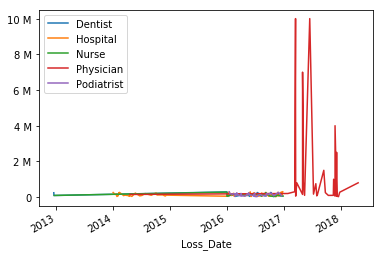

In [42]:
# df_claims_by_lob['Loss'].plot(legend=True)

## ref: https://stackoverflow.com/questions/40566413/matplotlib-pyplot-auto-adjust-unit-of-y-axis
from matplotlib.ticker import FuncFormatter
def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
#                     print(val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

def y_fmt2(x, y):
    return '{:2.2e}'.format(x).replace('e', 'x10^')


ax = df_claims_by_lob['Loss'].plot(legend=True)

ax[0].yaxis.set_major_formatter(FuncFormatter(y_fmt))
# ax[0].yaxis.set_major_formatter(FuncFormatter(y_fmt2))
plt.show()


**Recape -  Excel Vlookup function in python**

In [22]:
# list of tabs and how many tabs in the excel file

df = pd.ExcelFile('data/analysis3/ExampleMatch.xlsx')
print ('df.sheet_names=%s' % df.sheet_names)
number_tab = len(df.sheet_names)
number_tab
print("There are %s tab in the file." % (number_tab)) 

df.sheet_names=['premium', 'loss', 'rein']


3

There are 3 tab in the file.


In [23]:
# view each tab
df0 = pd.read_excel('data/analysis3/ExampleMatch.xlsx')
df1 = pd.read_excel('data/analysis3/ExampleMatch.xlsx', sheet_name = "premium")
df2 = pd.read_excel('data/analysis3/ExampleMatch.xlsx', sheet_name = "loss")
df3 = pd.read_excel('data/analysis3/ExampleMatch.xlsx', sheet_name = "rein")
df1[0:2]
df2[0:2]
df3[0:2]

,PolicyNumber,Last Name,Policy Effective Date,LOB,Policy Type,Premium
0,10244,Hallsworth,2017-08-07,Dentist,OCC,13330
1,10509,Hartle,2017-02-09,Podiatrist,OCC,5647


,Claim Number,PolicyNumber,Policy Type,Insured Last Name,Claim Report Date,LAE Paid,Loss Paid
0,886727,33524,OCC,Hallsworth,2012-12-20,63513,244908
1,889258,35163,OCC,Hartle,2013-01-03,98914,45447


,Policy Year,Insured Last Name,PolicyNumber,Policy Limit,Claim Number,Loss Date,Policy Start Date,Policy End Date,Indemnity Reserve,ALAE Reserve
0,2017,Hallsworth,10244,500K/1.5M,886727,2012-12-20,2017-08-07,2018-08-07,50000,20000
1,2017,Wilis,45474,500K/1.5M,881735,2013-02-05,2017-10-18,2018-10-18,50000,20000


In [24]:
# Policy's claim and reinsurance history in one table 
# make the common column (the one used as the joining reference) the dataframe index:
dfi = df1.set_index('PolicyNumber')

# join the three excel's tabs
dfj = pd.concat([df1, df2, df3], axis=1)
dfj[0:5].T

# save to a new file:
dfj.to_excel('data/analysis3/myjointfile.xlsx')

,0,1,2,3,4
PolicyNumber,10244,10509,10700,10880,10948
Last Name,Hallsworth,Hartle,Higgenbotham,Dumm,Bilyk
Policy Effective Date,2017-08-07 00:00:00,2017-02-09 00:00:00,2017-10-07 00:00:00,2017-07-08 00:00:00,2017-06-05 00:00:00
LOB,Dentist,Podiatrist,PA,Phy,Podiatrist
Policy Type,OCC,OCC,OCC,CM,CM
Premium,13330,5647,12021,232058,5132
Claim Number,886727,889258,883006,881123,880205
PolicyNumber,33524,35163,35937,14841,39619
Policy Type,OCC,OCC,OCC,CM,CM
Insured Last Name,Hallsworth,Hartle,Higgenbotham,Dumm,Bilyk


**Recape - Excel Index-Match function in python**

In [25]:
x = pd.DataFrame(data=list(range(0, 10)), columns=["List"])
x
y = pd.DataFrame(data=[(-1, "Small"), (4, "Medium"), (7, "Large")], 
                         columns=["List", "Category"])
y
pd.cut(x.List, y.List.tolist()+[np.inf], labels=y.Category)

,List
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


,List,Category
0,-1,Small
1,4,Medium
2,7,Large


0     Small
1     Small
2     Small
3     Small
4     Small
5    Medium
6    Medium
7    Medium
8     Large
9     Large
Name: List, dtype: category
Categories (3, object): [Small < Medium < Large]